In [1]:
from pathlib import Path
from datetime import datetime
from metpy.units import units
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import metpy.plots as plots
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

%matplotlib inline

In [4]:
### CHOOSE STATION AND VALID DATE AND TIME
YEAR = 2021
MONTH = 2
DAY = 15
TIME = 0

In [5]:
date = datetime(YEAR, MONTH, DAY, TIME)
station = 'CRP'
df = WyomingUpperAir.request_data(date, station)

In [6]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])
heights = df['height'].values * units(df.units['height'])

In [7]:
# mask = p >=100 * units.hPa
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

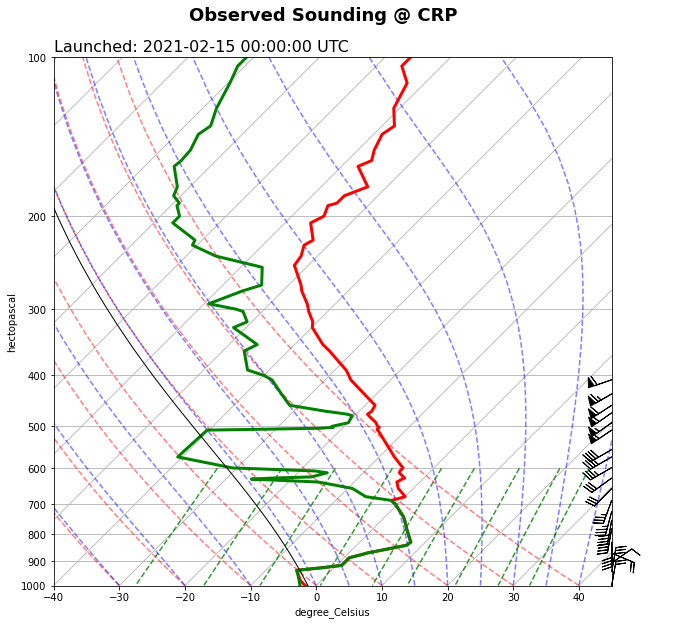

In [13]:
fig = plt.figure(figsize=(10, 10))
skew = plots.SkewT(fig, rotation=45)

skew.plot(p, T, 'red', linewidth=3)
skew.plot(p, Td, 'green', linewidth=3)

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 45)

skew.plot_barbs(p[idx], u[idx], v[idx])

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#parcel_path = mpcalc.parcel_profile(p, T[0], Td[0])
skew.plot(p, parcel_path, color='k', linewidth=1)
#skew.shade_cape(p, T, parcel_path, alpha=0.5)
#skew.shade_cin(p, T, parcel_path, alpha=0.5)

plt.suptitle(f"Observed Sounding @ {df['station'][0]}", fontsize=18, fontweight='bold', y=0.94)
plt.title(f"Launched: {df['time'][0]} UTC", fontsize=16, loc='left')

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'in-situ' / 'skewt'
plt.savefig(f'{graphics_dir}/{station}_{YEAR}_{MONTH}_{DAY}_{TIME}.png')

In [25]:
mpcalc.lcl(p[0], T[0], Td[0])

(1002.6192014272799 <Unit('hectopascal')>,
 21.531735694175758 <Unit('degree_Celsius')>)

In [26]:
mpcalc.lfc(p, T, Td)

(256.4126420376976 <Unit('hectopascal')>,
 -42.58812913955101 <Unit('degree_Celsius')>)

In [27]:
lfc_pressure, lfc_temperature = mpcalc.lfc(p, T, Td)

In [28]:
if lfc_pressure:
    skew.ax.axhline(lfc_pressure)

In [29]:
mpcalc.surface_based_cape_cin(p, T, Td)

(225.4282316236481 <Unit('joule / kilogram')>,
 -181.80677784193335 <Unit('joule / kilogram')>)

In [30]:
mpcalc.most_unstable_cape_cin(p, T, Td)

(1739.007129369113 <Unit('joule / kilogram')>,
 -8.547155368201535 <Unit('joule / kilogram')>)

In [31]:
mpcalc.most_unstable_parcel(p, T, Td)

(1000.0 <Unit('hectopascal')>,
 24.6 <Unit('degree_Celsius')>,
 22.9 <Unit('degree_Celsius')>,
 3)

In [32]:
pw = mpcalc.precipitable_water(Td, p)
pw = pw.to(units.inch)
pw

C:\Users\rayha\miniconda3\envs\unidata\lib\site-packages\metpy\calc\indices.py:54: FutureWarning: Input variables will be reordered in 1.0 to be (pressure, dewpt, bottom,top). To update to new input format before 1.0 is released, use`from metpy.future import precipitable_water`.
  '`from metpy.future import precipitable_water`.', FutureWarning)


1.8757262856171355 <Unit('inch')>